In [1]:
import pandas as pd

In [2]:
independent_expenditure_path = '/content/independent_expenditure_2024.csv'
voter_turnout_path = '/content/Turnout_2024G_v0.3.csv'

Cleaning the independent expenditure data - here i am taking only a few columns into consideration which I want for the analysis.

In [3]:
independent_expenditure = pd.read_csv(independent_expenditure_path)


<ipython-input-3-4fef18198356>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  independent_expenditure = pd.read_csv(independent_expenditure_path)


In [4]:
filtered_independent_expenditure = independent_expenditure[
    ['cand_id', 'cand_name', 'ele_type', 'can_office_state', 'cand_pty_aff',
     'exp_amo', 'exp_date', 'agg_amo', 'pur', 'pay']
]

In [5]:
filtered_independent_expenditure

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,cand_id,cand_name,ele_type,can_office_state,cand_pty_aff,exp_amo,exp_date,agg_amo,pur,pay
0,H4CO08034,"Evans, Gabe",G,CO,REPUBLICAN PARTY,9000.00,NaN,9000.00,texts supporting Gabe Evans CO-8,TTHM.com
1,P80000722,"Harris, Kamal D",G,NaN,DEMOCRATIC PARTY,50000.00,27-Sep-24,57000.00,Advertising Services,Northwind Strategies
2,P80000722,"Harris, Kamal D",G,NaN,DEMOCRATIC PARTY,15000.00,30-Sep-24,72000.00,Estimated costs of consultant work,1000 Women Strong PAC
3,P80000722,"Harris, Kamal D",G,NaN,DEMOCRATIC PARTY,7000.00,27-Sep-24,7000.00,Production Costs for Ads,Corsair Communications
4,S4MD00327,"Alsobrooks, Angela",G,MD,DEMOCRATIC PARTY,864.15,29-Oct-24,1539.08,Direct Mail Production and Distribution (Estim...,Pendulum Creative Group
...,...,...,...,...,...,...,...,...,...,...
68753,H0WI03175,"Van Orden, Derrick",G,WI,REPUBLICAN PARTY,10000.00,NaN,531547.30,TV Ad Production (Estimate),GPS Impact
68754,H0WI03175,"Van Orden, Derrick",G,WI,REPUBLICAN PARTY,21547.30,NaN,21547.30,"Direct Mail Production, Printing, and Postage ...","Deliver Strategies, LLC"
68755,H2MI10150,"JAMES, JOHN",G,MI,REPUBLICAN PARTY,2500.00,16-Sep-24,2500.00,Media,Lamar Media
68756,H2MI10150,"JAMES, JOHN",G,MI,REPUBLICAN PARTY,4732.85,08-Oct-24,8234.85,Media,Lamar Media


I found that there are some null values in the state column (can_office_state) so I will remove those rows.

This is because I will be performing the analysis on the state-wise data.

In [6]:
filtered_independent_expenditure = filtered_independent_expenditure.dropna(subset=['can_office_state'])
print(f"Number of rows after filtering: {len(filtered_independent_expenditure)}")

Number of rows after filtering: 56453


In [7]:
filtered_independent_expenditure

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,cand_id,cand_name,ele_type,can_office_state,cand_pty_aff,exp_amo,exp_date,agg_amo,pur,pay
0,H4CO08034,"Evans, Gabe",G,CO,REPUBLICAN PARTY,9000.00,NaN,9000.00,texts supporting Gabe Evans CO-8,TTHM.com
4,S4MD00327,"Alsobrooks, Angela",G,MD,DEMOCRATIC PARTY,864.15,29-Oct-24,1539.08,Direct Mail Production and Distribution (Estim...,Pendulum Creative Group
5,S4MD00327,"Alsobrooks, Angela",G,MD,DEMOCRATIC PARTY,15102.50,02-Nov-24,16667.58,Event Coordination (Estimate),DT Event Consulting
6,S6PA00217,"Casey, Bob",G,PA,DEMOCRATIC PARTY,893.12,29-Oct-24,1785.87,Direct Mail Production and Distribution (Estim...,Pendulum Creative Group
7,H2NY04277,"D'Esposito, Anthony",G,NY,REPUBLICAN PARTY,5318.43,28-Oct-24,25743.01,Direct Mail Production and Distribution (Estim...,Pendulum Creative Group
...,...,...,...,...,...,...,...,...,...,...
68753,H0WI03175,"Van Orden, Derrick",G,WI,REPUBLICAN PARTY,10000.00,NaN,531547.30,TV Ad Production (Estimate),GPS Impact
68754,H0WI03175,"Van Orden, Derrick",G,WI,REPUBLICAN PARTY,21547.30,NaN,21547.30,"Direct Mail Production, Printing, and Postage ...","Deliver Strategies, LLC"
68755,H2MI10150,"JAMES, JOHN",G,MI,REPUBLICAN PARTY,2500.00,16-Sep-24,2500.00,Media,Lamar Media
68756,H2MI10150,"JAMES, JOHN",G,MI,REPUBLICAN PARTY,4732.85,08-Oct-24,8234.85,Media,Lamar Media


In [8]:
filtered_independent_expenditure = filtered_independent_expenditure[filtered_independent_expenditure['can_office_state'] != '0']

In [9]:
general_elections_data = filtered_independent_expenditure[filtered_independent_expenditure['ele_type'] == 'G']

Here i am keeping only general elections as only general elections will be taken for the analysis

In [10]:
general_elections_data = general_elections_data.dropna(subset=['cand_pty_aff', 'exp_date'])
general_elections_data


,cand_id,cand_name,ele_type,can_office_state,cand_pty_aff,exp_amo,exp_date,agg_amo,pur,pay
4,S4MD00327,"Alsobrooks, Angela",G,MD,DEMOCRATIC PARTY,864.15,29-Oct-24,1539.08,Direct Mail Production and Distribution (Estim...,Pendulum Creative Group
5,S4MD00327,"Alsobrooks, Angela",G,MD,DEMOCRATIC PARTY,15102.50,02-Nov-24,16667.58,Event Coordination (Estimate),DT Event Consulting
6,S6PA00217,"Casey, Bob",G,PA,DEMOCRATIC PARTY,893.12,29-Oct-24,1785.87,Direct Mail Production and Distribution (Estim...,Pendulum Creative Group
7,H2NY04277,"D'Esposito, Anthony",G,NY,REPUBLICAN PARTY,5318.43,28-Oct-24,25743.01,Direct Mail Production and Distribution (Estim...,Pendulum Creative Group
8,H4NY18117,"Esposito, Alison",G,NY,REPUBLICAN PARTY,485.69,28-Oct-24,1353.51,Direct Mail Production and Distribution (Estim...,Pendulum Creative Group
...,...,...,...,...,...,...,...,...,...,...
68740,P00009423,"HARRIS, KAMALA",G,DC,DEMOCRATIC PARTY,92771.92,22-Oct-24,92771.92,Mailing Printing and Postage,Convergence Targeted Communications
68741,P00009423,"HARRIS, KAMALA",G,DC,DEMOCRATIC PARTY,116756.00,25-Oct-24,314807.92,Mailing Printing and Postage,Convergence Targeted Communications
68755,H2MI10150,"JAMES, JOHN",G,MI,REPUBLICAN PARTY,2500.00,16-Sep-24,2500.00,Media,Lamar Media
68756,H2MI10150,"JAMES, JOHN",G,MI,REPUBLICAN PARTY,4732.85,08-Oct-24,8234.85,Media,Lamar Media


Above, I am deleting the columns with null value for theirt party names. It is important to have the party names for further analysis so removing the null was the best option

In [11]:
import matplotlib.pyplot as plt
import numpy as np


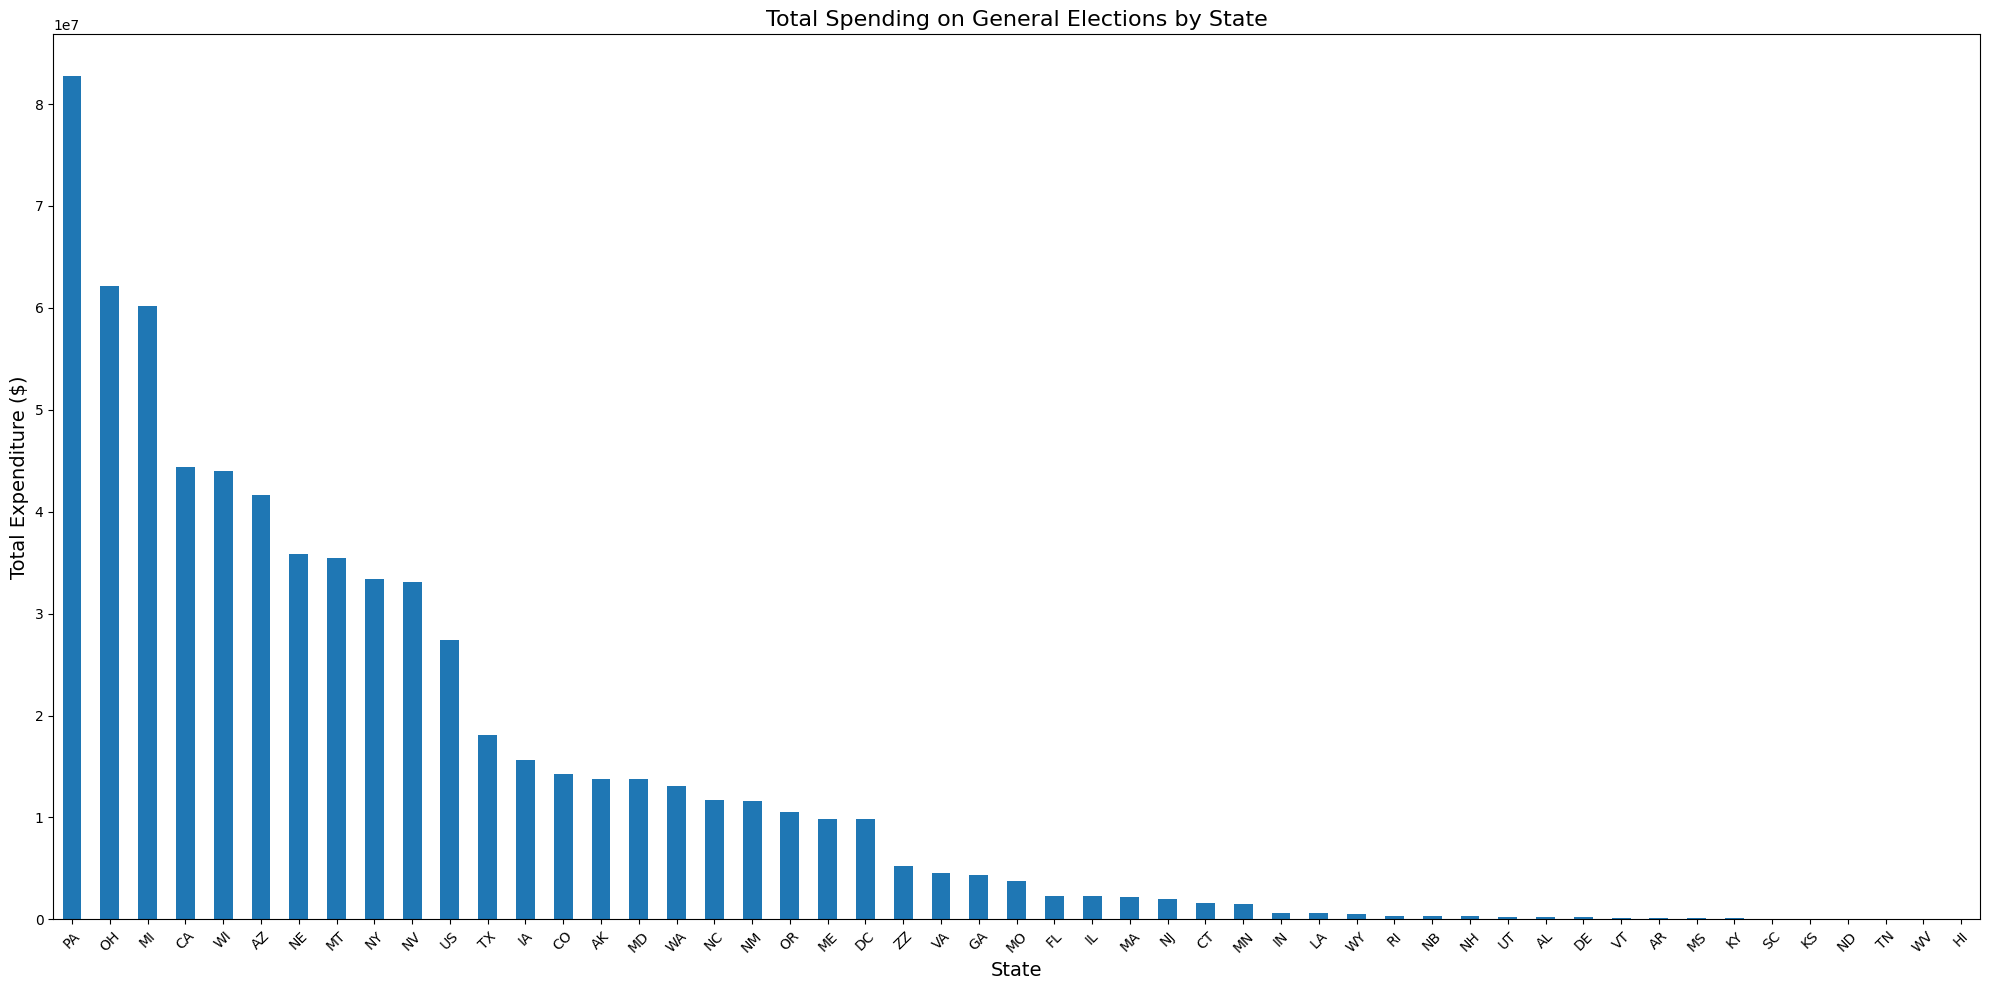

In [12]:
state_expenditure = general_elections_data[
    (general_elections_data['exp_amo'] >= 1000) & (general_elections_data['exp_amo'] <= 1000000)
].groupby('can_office_state')['exp_amo'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 10))
state_expenditure.plot(kind='bar')


plt.title('Total Spending on General Elections by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Expenditure ($)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Interpretation of the Chart: "Total Spending on General Elections by State"
Overview:**

The chart shows total election expenditures by state, with states sorted in descending order based on spending.
Top Spending States:

- Pennsylvania (PA) is the highest spender, followed by Ohio (OH) and Michigan (MI).
These states are historically significant in elections, often considered swing states or battlegrounds where campaigns focus more resources.
Mid-Tier States:

- States like California (CA), Wisconsin (WI), and Arizona (AZ) have moderately high spending.
These could represent states with large populations, competitive districts, or significant media markets.
Lower Spending States:

- Toward the right, states such as Hawaii (HI), West Virginia (WV), and North Dakota (ND) have significantly lower spending.
These states might be less competitive politically or have smaller populations, leading to fewer campaign resources being allocated.
Overall Trend:

- A sharp decline in spending is noticeable as you move from left to right, with a few states receiving disproportionately higher investments compared to others.
This illustrates the strategic allocation of campaign funds, focusing more on states deemed critical for winning the election.

Above, need to know that we have kept the range from 1,000 USD to 1 Million USD
for the spending exp_amo

Spending by each party now:-

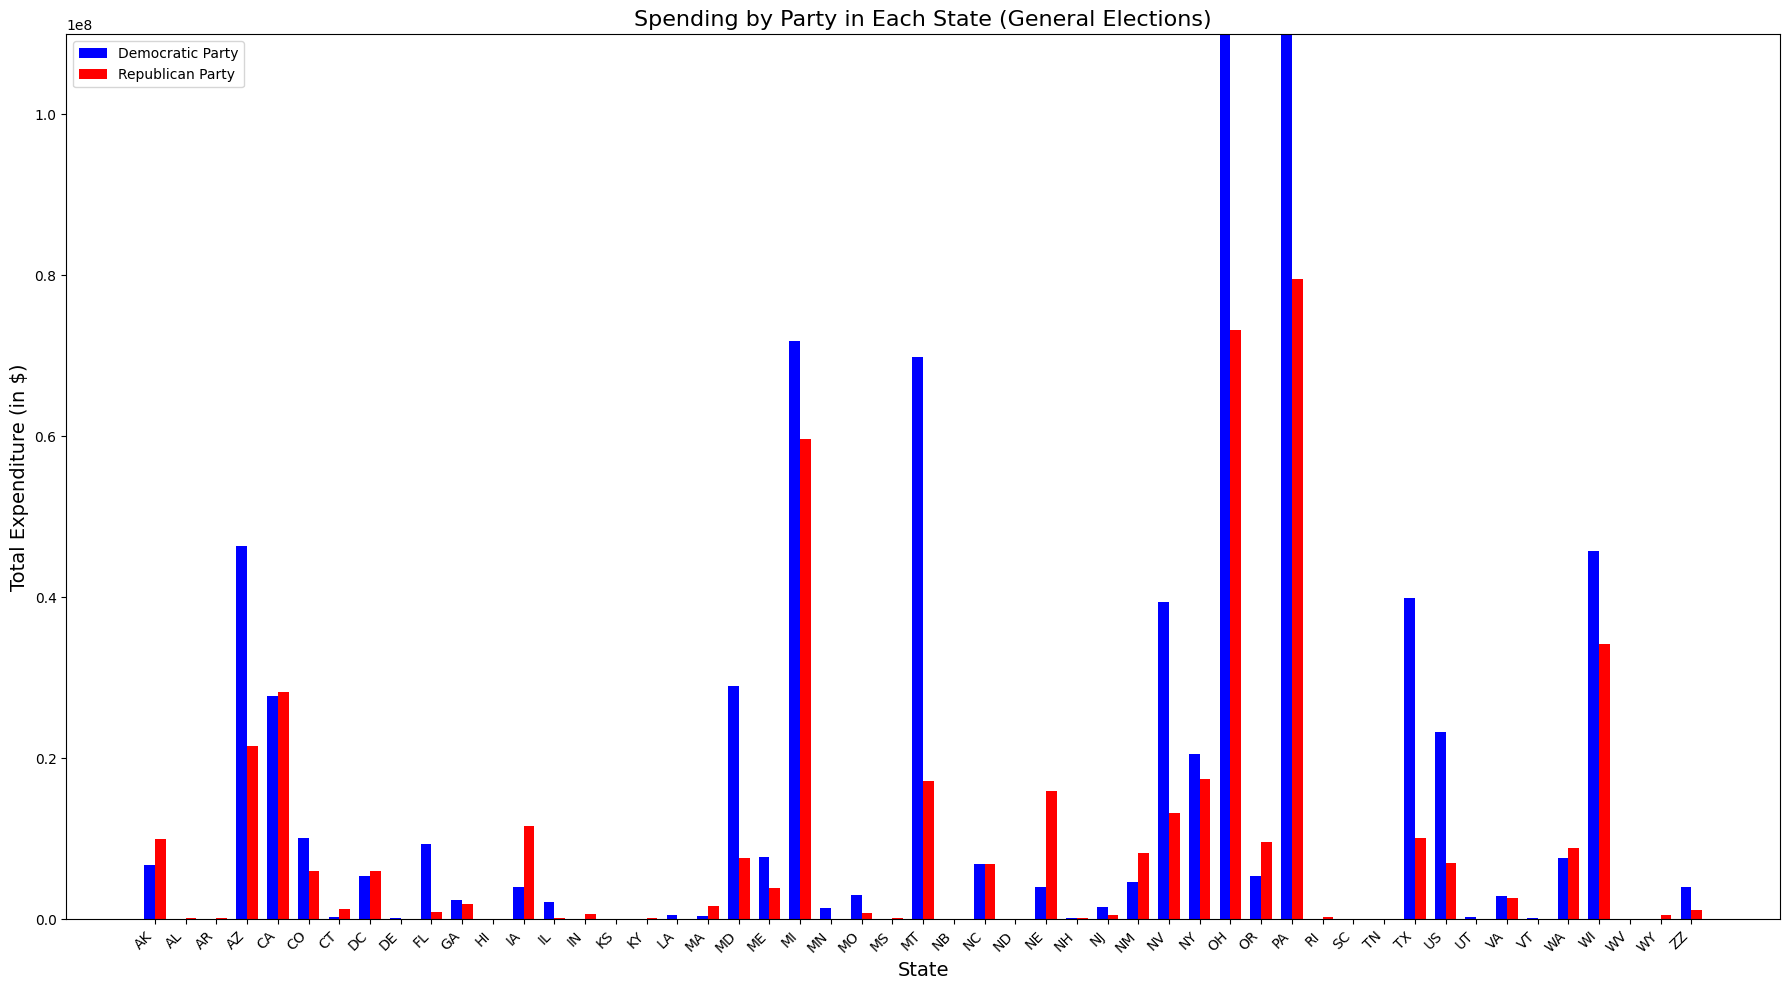

In [13]:
party_expenses = general_elections_data[
    (general_elections_data['exp_amo'] >= 1000) & (general_elections_data['exp_amo'] <= 100000000)

].groupby(['can_office_state', 'cand_pty_aff'])['exp_amo'].sum().unstack()
states = party_expenses.index

democratic_expenses = party_expenses['DEMOCRATIC PARTY'] if 'DEMOCRATIC PARTY' in party_expenses.columns else np.zeros(len(states))
republican_expenses = party_expenses['REPUBLICAN PARTY'] if 'REPUBLICAN PARTY' in party_expenses.columns else np.zeros(len(states))

x = np.arange(len(states))
width = 0.35

fig, ax = plt.subplots(figsize=(18, 10))
ax.bar(x - width / 2, democratic_expenses, width, label='Democratic Party', color='blue')
ax.bar(x + width / 2, republican_expenses, width, label='Republican Party', color='red')

plt.ylim(0, max(democratic_expenses.max(), republican_expenses.max()) * 0.8)

ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('Total Expenditure (in $)', fontsize=14)
ax.set_title('Spending by Party in Each State (General Elections)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(states, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

ABove, I am using the range as USD 10,000 to USD 100000000  (Ten thousand to One hundred million)


**Interpretation of the Chart: "Spending by Party in Each State (General Elections)**

- The chart illustrates the total election spending by the Democratic Party (blue bars) and the Republican Party (red bars) across various states.
Key Observations:

**Democratic Dominance:**

- In several states, the Democratic Party's spending far exceeds that of the Republican Party. For instance, states like California (CA) and New York (NY) show significantly higher blue bars.


**Republican Dominance:**

- The Republican Party's spending surpasses the Democratic Party's in states such as Texas (TX) and Ohio (OH), where the red bars are taller.

**Competitive States:**
- States like Florida (FL) and Pennsylvania (PA) show substantial spending by both parties, suggesting high competitiveness in these battleground states.

***Spending Trends:***

**Swing States:**

- States with a history of being politically competitive (e.g., PA, FL, OH) tend to have significant spending by both parties.


**Partisan Strongholds:**

- In states where one party traditionally dominates (e.g., CA for Democrats and TX for Republicans), the spending is largely skewed toward that party.

**Smaller or Less Competitive States:**

States such as Wyoming (WY), Vermont (VT), and North Dakota (ND) show minimal spending from both parties, reflecting their smaller populations or less competitive nature.

**Insights on Strategy:**

- Higher spending in swing states reflects their importance in deciding the outcome of the elections.
- Lower spending in less competitive states or smaller states indicates a focus on areas with a higher potential for influencing the election outcome.

**Comparison of Parties:**

- The Democratic Party generally shows higher spending in urbanized and coastal states.
- The Republican Party spends more in rural and traditionally conservative states.

<ipython-input-14-49b7fe49eebc>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  general_elections_data['exp_date'] = pd.to_datetime(general_elections_data['exp_date'])


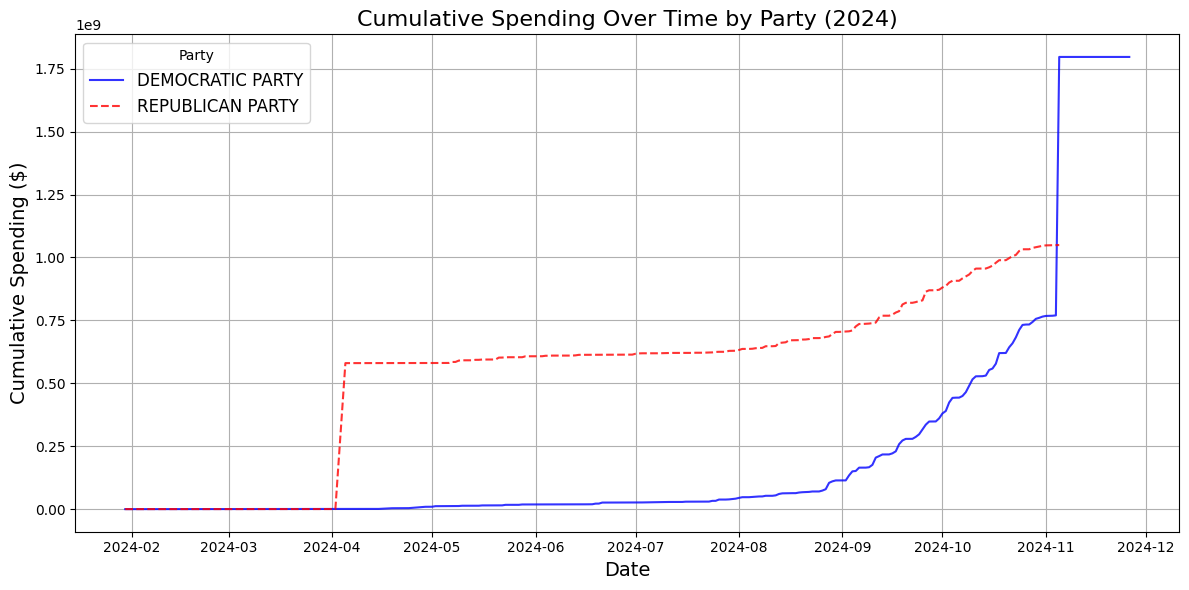

In [14]:
import matplotlib.pyplot as plt

general_elections_data['exp_date'] = pd.to_datetime(general_elections_data['exp_date'])

party_data = general_elections_data[general_elections_data['cand_pty_aff'].isin(['DEMOCRATIC PARTY', 'REPUBLICAN PARTY'])]

daily_spending = party_data.groupby(['cand_pty_aff', 'exp_date'])['exp_amo'].sum().reset_index()

daily_spending['cumulative_spending'] = daily_spending.groupby('cand_pty_aff')['exp_amo'].cumsum()

daily_spending_2024 = daily_spending[
    (daily_spending['exp_date'] >= '2024-01-01') & (daily_spending['exp_date'] <= '2024-12-31')
]

plt.figure(figsize=(12, 6))

for party, color, style in zip(['DEMOCRATIC PARTY', 'REPUBLICAN PARTY'], ['blue', 'red'], ['-', '--']):
    party_subset = daily_spending_2024[daily_spending_2024['cand_pty_aff'] == party]
    plt.plot(
        party_subset['exp_date'],
        party_subset['cumulative_spending'],
        label=party,
        color=color,
        linestyle=style,
        alpha=0.8
    )

    plt.legend(title='Party', loc='upper left', fontsize=12)


plt.title('Cumulative Spending Over Time by Party (2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Spending ($)', fontsize=14)
plt.grid(True)
plt.tight_layout()

plt.show()

Above is the spoending as per the dates

**1. Overview:**

- The chart shows the cumulative spending of the Democratic Party (blue line) and Republican Party (red dashed line) over the course of 2024.
- The x-axis represents the timeline (dates in 2024), while the y-axis shows cumulative spending in dollars.

**2. Key Observations:**

**Democratic Party:**

- The spending starts slowly early in the year.
- A sharp increase occurs toward the end of the year, likely indicating significant spending during the final stages of the election campaign.
- Total cumulative spending by the Democratic Party surpasses $1.75 billion by the end of 2024, higher than the Republican Party.

**Republican Party:**

- The spending exhibits a rapid increase early in the year, suggesting a strong focus on early campaign activities or primaries.
- Spending stabilizes through the middle months but rises steadily until the end of the year.
- Total cumulative spending by the Republican Party is approximately $1 billion, lower than the Democratic Party.

**3.Spending Trends:**

**Republican Party Early Focus:**

- The steep rise in Republican spending during the first quarter may reflect significant investments in early advertising, mobilization, or primaries.

**Democratic Party Late Surge:**

- The steep increase in Democratic spending toward the end of the year likely reflects efforts to dominate the final stages of the election cycle, including advertising, rallies, and get-out-the-vote efforts.

**4. Comparative Insights:**

- The Democratic Party ultimately outspends the Republican Party, with much of the spending concentrated in the final months of the year.
- The Republican Party seems to emphasize early spending but does not match the Democratic Party’s late-year surge.

**5. Potential Implications:**

**Campaign Strategies:**

The Republican Party may have aimed for early momentum, while the Democratic Party's strategy might have focused on making a strong final impression leading up to Election Day.

**Outcome Influence:**

The higher cumulative spending by the Democratic Party could indicate a more extensive or impactful campaign in terms of advertising reach and voter engagement.


In [15]:
new_general_elections_data = general_elections_data[
    (general_elections_data['exp_amo'] >= 1000) &
    (general_elections_data['exp_amo'] <= 1000000)
]

print(new_general_elections_data.head())

      cand_id            cand_name ele_type can_office_state  \
5   S4MD00327   Alsobrooks, Angela        G               MD   
7   H2NY04277  D'Esposito, Anthony        G               NY   
9   H4NY04158        Gillen, Laura        G               NY   
10  H4NY04158        Gillen, Laura        G               NY   
12  H4NY04158        Gillen, Laura        G               NY   

        cand_pty_aff   exp_amo   exp_date   agg_amo  \
5   DEMOCRATIC PARTY  15102.50 2024-11-02  16667.58   
7   REPUBLICAN PARTY   5318.43 2024-10-28  25743.01   
9   DEMOCRATIC PARTY   3120.07 2024-10-29  28863.08   
10  DEMOCRATIC PARTY   7500.00 2024-10-18   9141.83   
12  DEMOCRATIC PARTY   5289.32 2024-10-26  15106.15   

                                                  pur  \
5                       Event Coordination (Estimate)   
7   Direct Mail Production and Distribution (Estim...   
9   Direct Mail Production and Distribution (Estim...   
10                           Phone Banking (Estimate)   

In [16]:
shape_new_general_elections_data = filtered_independent_expenditure.shape
print(f"Filtered dataset shape: {shape_new_general_elections_data[0]} rows and {shape_new_general_elections_data[1]} columns")

Filtered dataset shape: 55722 rows and 10 columns


Above two cells, I specified a specific range to the independent exp dataset...making it from USD 100 to USD 100,000. This is done to do further analysis in a more precise way and to get a generic idea. We can see, now I have around 56,452 rows for my consideration.

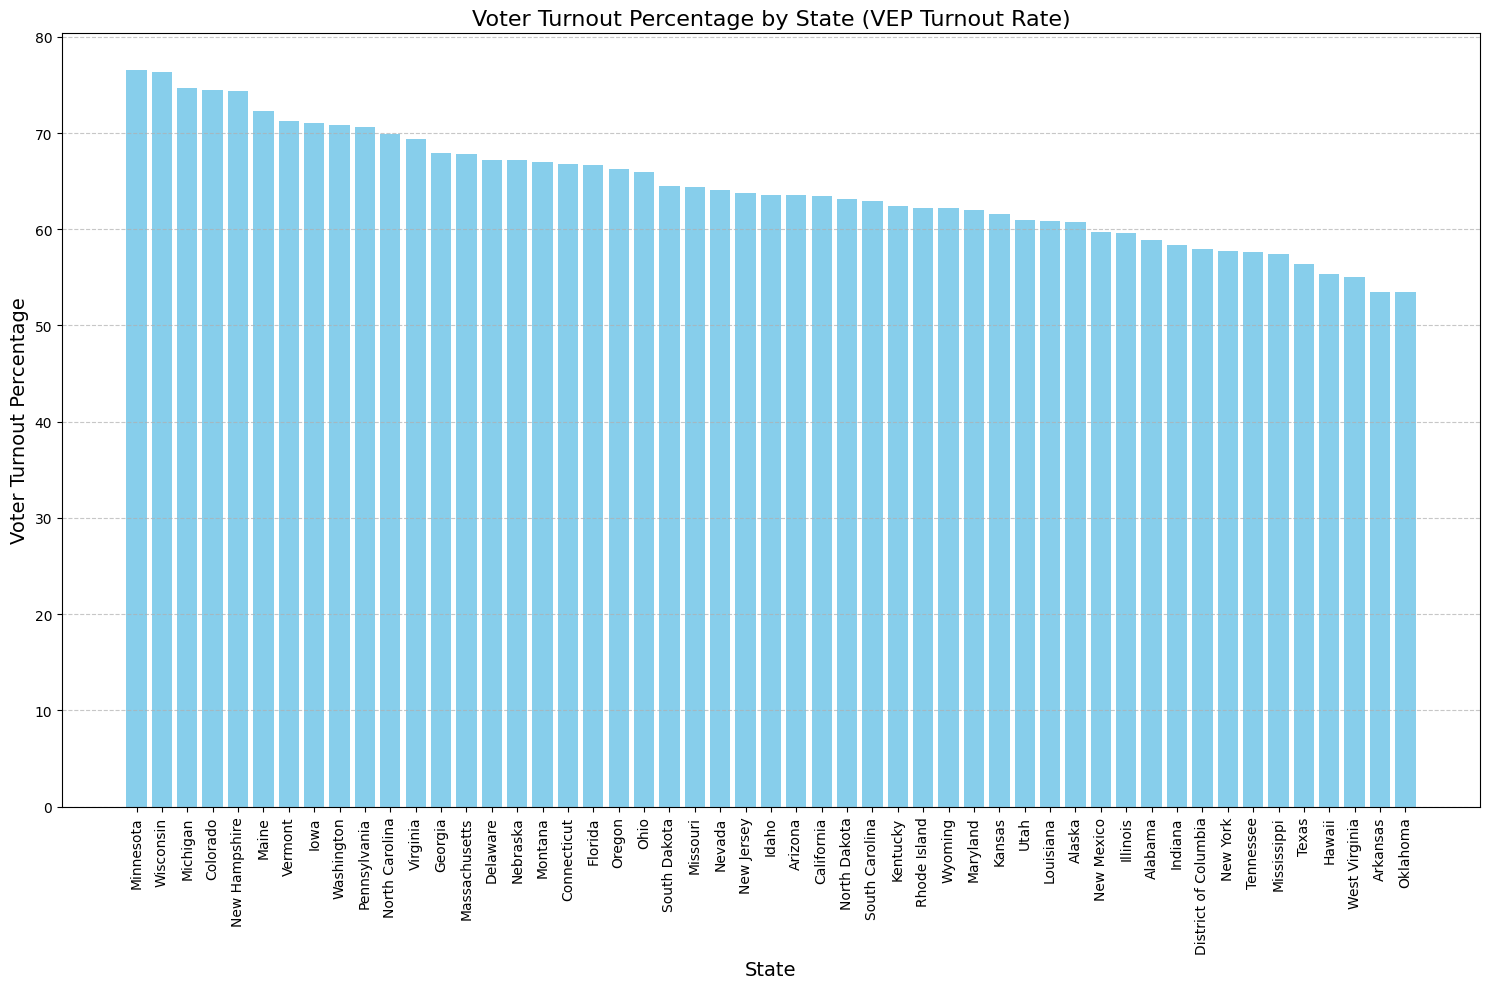

In [17]:
file_path = '/content/Turnout_2024G_v0.3.csv'
turnout_data = pd.read_csv(file_path)

state_data = turnout_data[turnout_data['STATE_ABV'] != 'US'].copy()

state_data.loc[:, 'VEP_TURNOUT_RATE'] = state_data['VEP_TURNOUT_RATE'].str.rstrip('%').astype(float)

# Sorting states by VEP_TURNOUT_RATE in descending order for clarity
state_stats_sorted = state_data.sort_values(by='VEP_TURNOUT_RATE', ascending=False)

plt.figure(figsize=(15, 10))
plt.bar(state_stats_sorted['STATE'], state_stats_sorted['VEP_TURNOUT_RATE'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Voter Turnout Percentage by State (VEP Turnout Rate)', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Voter Turnout Percentage', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ABove we can see the state wise voters turnout

Correlation between total spending and total ballots counted: 0.6394917245716906


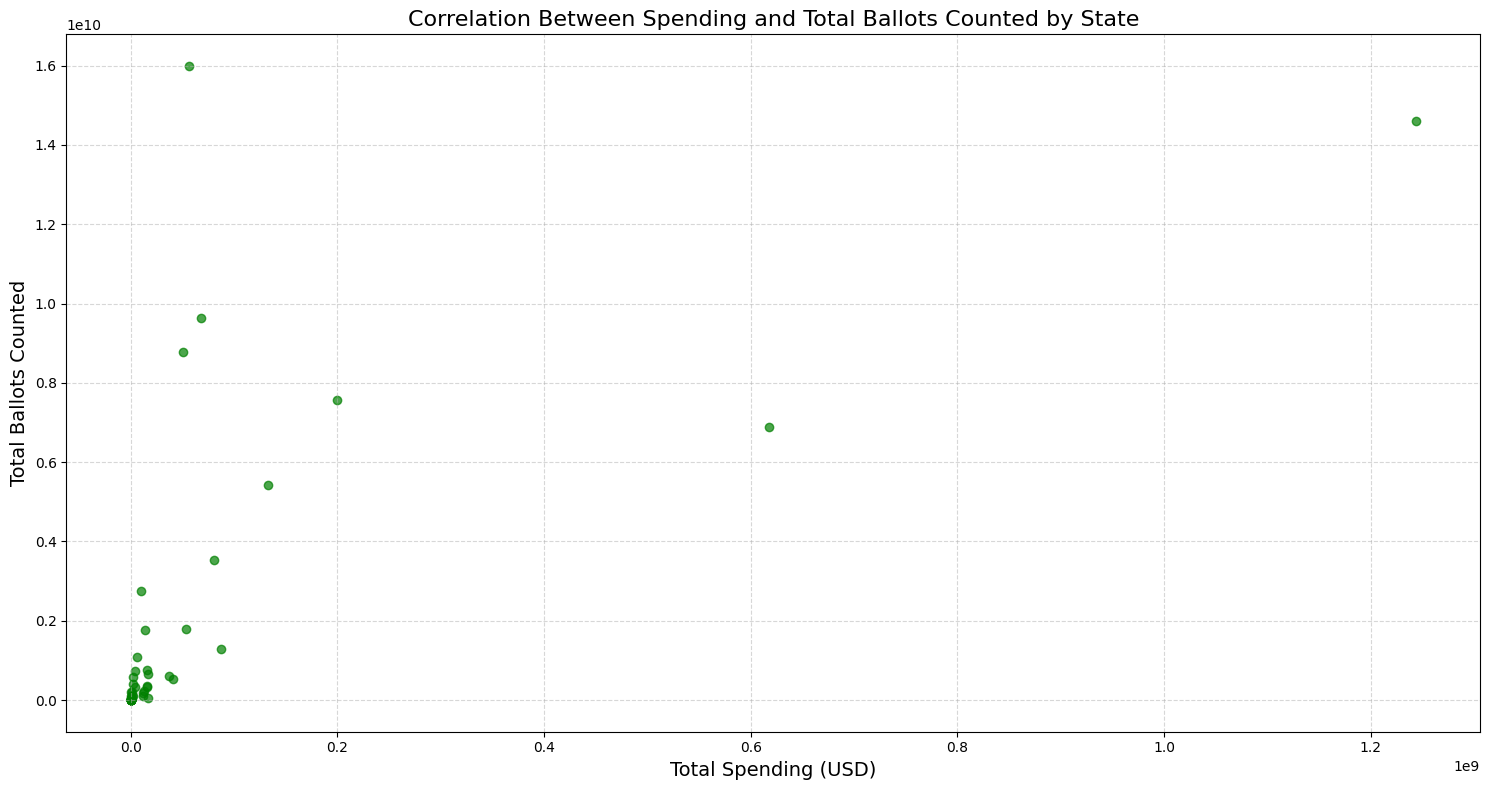

In [18]:
merged_data = pd.merge(
    general_elections_data,
    turnout_data[turnout_data['STATE_ABV'] != 'US'],  # Exclude 'US'
    left_on='can_office_state',
    right_on='STATE_ABV',
    how='inner'
)

# here i am grouping by state and calculating total spending and total ballots counted
state_analysis = merged_data.groupby('STATE_ABV').agg(
    total_spending=('exp_amo', 'sum'),
    total_ballots=('TOTAL_BALLOTS_COUNTED', 'sum')
).reset_index()

# Calculating the correlation between total spending and total ballots counted
correlation = state_analysis['total_spending'].corr(state_analysis['total_ballots'])
print(f"Correlation between total spending and total ballots counted: {correlation}")

state_analysis_sorted = state_analysis.sort_values(by='total_ballots', ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.scatter(state_analysis_sorted['total_spending'], state_analysis_sorted['total_ballots'], color='green', alpha=0.7)
plt.title('Correlation Between Spending and Total Ballots Counted by State', fontsize=16)
plt.xlabel('Total Spending (USD)', fontsize=14)
plt.ylabel('Total Ballots Counted', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

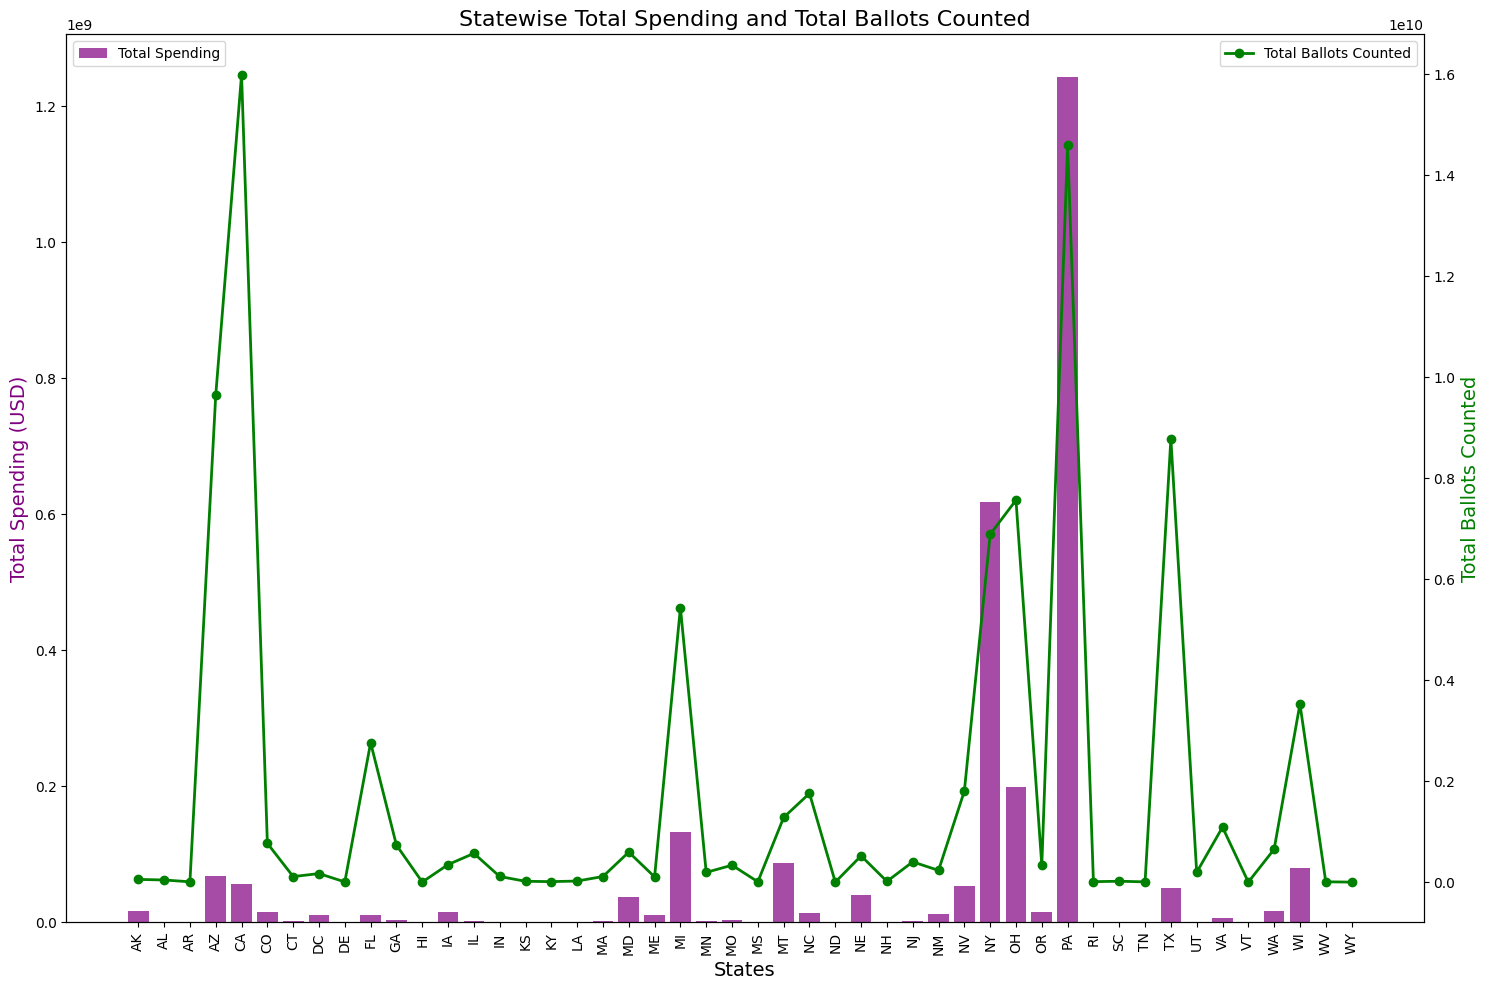

In [19]:
# Here I am grouping data by state to calculate total spending (both parties combined) and total ballots counted
statewise_totals = merged_data.groupby('STATE_ABV').agg(
    total_spending=('exp_amo', 'sum'),
    total_ballots=('TOTAL_BALLOTS_COUNTED', 'sum')
).reset_index()


fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.bar(statewise_totals['STATE_ABV'], statewise_totals['total_spending'], label='Total Spending', color='purple', alpha=0.7)
ax1.set_xlabel('States', fontsize=14)
ax1.set_ylabel('Total Spending (USD)', fontsize=14, color='purple')

ax2 = ax1.twinx()
ax2.plot(statewise_totals['STATE_ABV'], statewise_totals['total_ballots'], label='Total Ballots Counted', color='green', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Total Ballots Counted', fontsize=14, color='green')

ax1.set_title('Statewise Total Spending and Total Ballots Counted', fontsize=16)
ax1.set_xticks(range(len(statewise_totals['STATE_ABV'])))
ax1.set_xticklabels(statewise_totals['STATE_ABV'], rotation=90)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


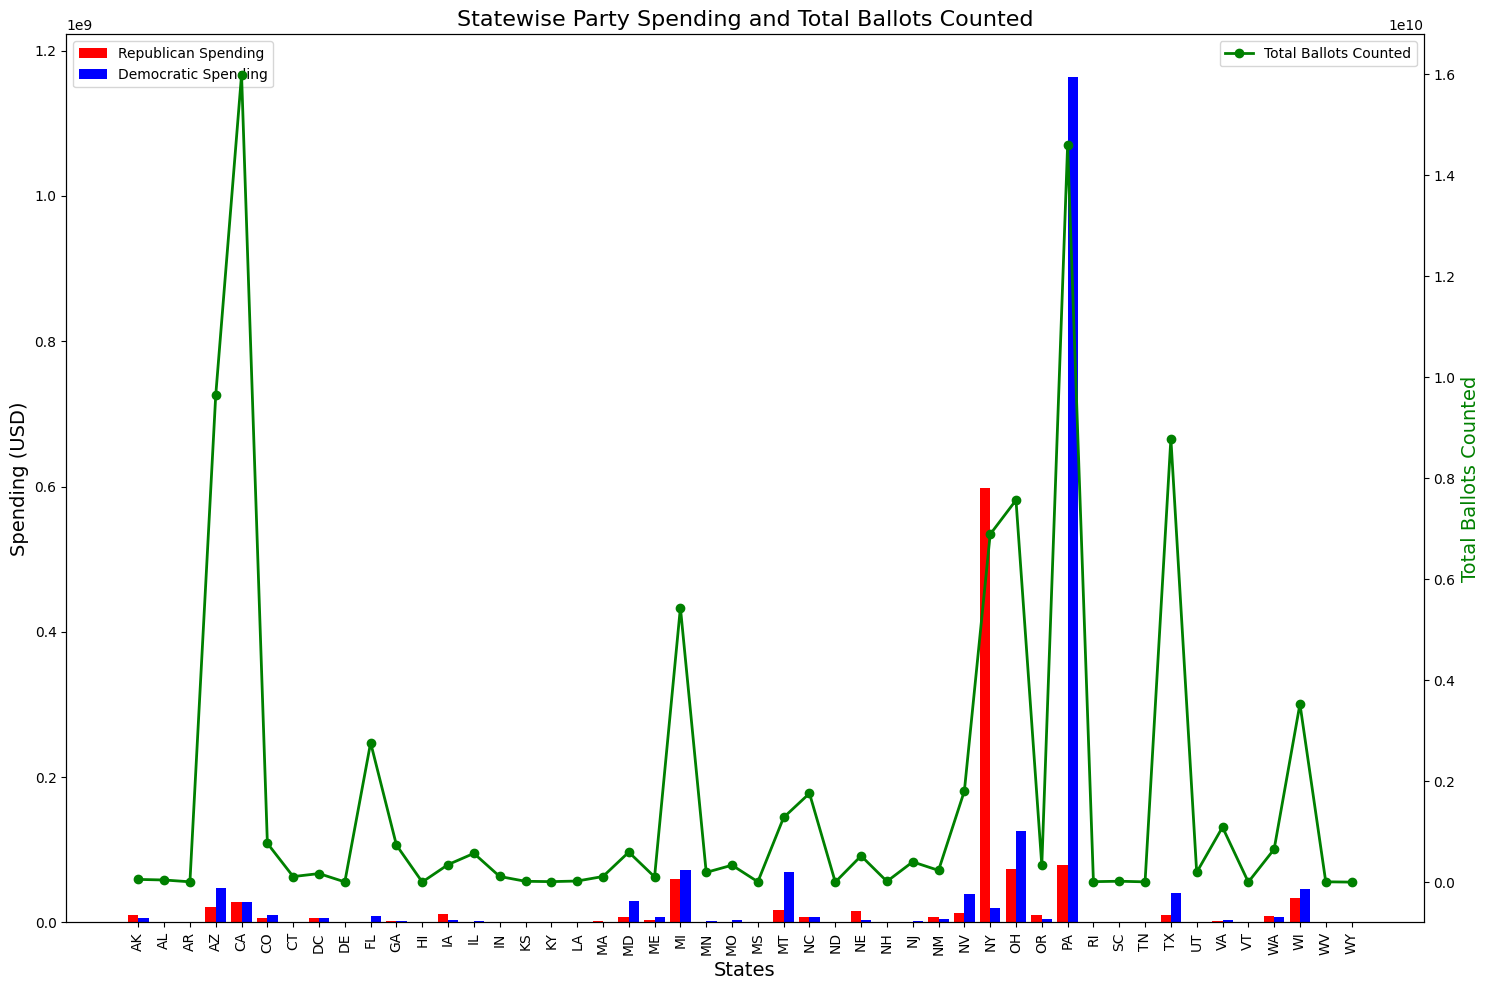

In [20]:
state_party_analysis = merged_data.groupby(['STATE_ABV', 'cand_pty_aff']).agg(
    total_spending=('exp_amo', 'sum'),
    total_ballots=('TOTAL_BALLOTS_COUNTED', 'sum')
).reset_index()

state_party_pivot = state_party_analysis.pivot(
    index='STATE_ABV',
    columns='cand_pty_aff',
    values='total_spending'
).fillna(0)

state_party_pivot['Total Ballots Counted'] = state_party_analysis.groupby('STATE_ABV')['total_ballots'].sum()

states = state_party_pivot.index
republican_spending = state_party_pivot.get('REPUBLICAN PARTY', 0)
democratic_spending = state_party_pivot.get('DEMOCRATIC PARTY', 0)
total_ballots = state_party_pivot['Total Ballots Counted']

fig, ax1 = plt.subplots(figsize=(15, 10))
bar_width = 0.4
x = np.arange(len(states))
bars1 = ax1.bar(x - bar_width/2, republican_spending, bar_width, label='Republican Spending', color='red')
bars2 = ax1.bar(x + bar_width/2, democratic_spending, bar_width, label='Democratic Spending', color='blue')

ax2 = ax1.twinx()
ax2.plot(x, total_ballots, label='Total Ballots Counted', color='green', marker='o', linestyle='-', linewidth=2)

ax1.set_xlabel('States', fontsize=14)
ax1.set_ylabel('Spending (USD)', fontsize=14, color='black')
ax2.set_ylabel('Total Ballots Counted', fontsize=14, color='green')
ax1.set_title('Statewise Party Spending and Total Ballots Counted', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(states, rotation=90)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()



---



In [21]:
file_path = '/content/weekspend_USA.csv'
spending_data = pd.read_csv(file_path)

print("Dataset Info:")
spending_data.info()

print("\nFirst 5 Rows:")
print(spending_data.head())

print("\nMissing Values:")
print(spending_data.isnull().sum())

print("\nDescriptive Statistics:")
print(spending_data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7790 entries, 0 to 7789
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   week              7788 non-null   float64
 1   week_to_election  7788 non-null   float64
 2   admin             7717 non-null   float64
 3   consulting        7355 non-null   float64
 4   digital           7614 non-null   float64
 5   field             6962 non-null   float64
 6   fund              7369 non-null   float64
 7   media             7257 non-null   float64
 8   poll              6700 non-null   float64
 9   legal             7269 non-null   float64
 10  travel            7333 non-null   float64
 11  other             4197 non-null   float64
 12  total             7790 non-null   float64
 13  election          7790 non-null   object 
 14  commtype          7789 non-null   object 
 15  party_combined    7790 non-null   object 
 16  Unnamed: 16       0 non-null

In [22]:
exclude_columns = ['week', 'week_to_election', 'election', 'commtype', 'party_combined']

# Select only numeric columns, excluding the excluded columns
numeric_columns = spending_data.select_dtypes(include=['float64', 'int64']).columns
columns_to_process = [col for col in numeric_columns if col not in exclude_columns]

# Impute missing values (NaN) with column means for the selected columns, ignoring zeros
spending_data[columns_to_process] = spending_data[columns_to_process].fillna(spending_data[columns_to_process].mean())

# Verify the updated dataset
print("Imputation complete. Sample data:")
print(spending_data.head())

Imputation complete. Sample data:
   week  week_to_election     admin  consulting   digital     field      fund  \
0   1.0             -96.0  5.105883    0.903145  2.876163  0.059819  1.838914   
1   1.0             -96.0  3.291601    1.283100  0.629926  0.113894  0.825544   
2   1.0             -96.0  0.205645    0.073013  0.036916  0.000000  0.093384   
3   1.0             -96.0  0.721695    0.295888  0.086502  0.002208  0.137279   
4   1.0             -96.0  1.457621    0.378370  0.360233  0.018586  0.108481   

      media      poll     legal    travel     other      total       election  \
0  0.181213  0.094028  0.726550  0.510632  0.025583  12.321928  2020 election   
1  0.977716  0.083117  0.355157  0.433815  0.079187   8.073058  2020 election   
2  0.001761  0.000000  0.047236  0.013361  0.018402   0.489718  2020 election   
3  0.068381  0.078461  0.121839  0.162632  0.072687   1.747571  2020 election   
4  0.033858  0.044622  0.184415  0.174188  0.013114   2.773488  2020 elect

In [23]:
president_expenses = spending_data[spending_data['commtype'].str.contains('president', case=False, na=False)]

# Verify the filtered dataset
print("Filtered data for President-related expenses:")
print(president_expenses['commtype'].unique())  # Check unique values in the commtype column
print(president_expenses.head())

Filtered data for President-related expenses:
['president']
    week  week_to_election     admin  consulting   digital     field  \
14   1.0             -96.0  0.498346    0.031441  0.302187  0.229810   
15   1.0             -96.0  0.000018    0.425918  0.000550  0.229810   
16   1.0             -96.0  0.256922    0.198412  0.168081  0.000876   
37   2.0             -95.0  0.282753    0.289543  0.128412  0.000045   
38   2.0             -95.0  0.005707    0.004495  0.000113  0.229810   

        fund     media      poll     legal    travel     other     total  \
14  0.730913  0.004848  0.002272  0.015153  0.013154  0.001546  0.868947   
15  0.730913  3.298684  0.151872  0.102770  0.157712  0.006886  0.000568   
16  0.340138  0.452524  0.151872  0.000194  0.007939  0.005978  1.431064   
37  0.384994  0.017934  0.151872  0.102770  0.046202  0.002929  1.152811   
38  0.730913  3.298684  0.151872  0.004280  0.157712  0.006886  0.014596   

         election   commtype party_combined  Unnam

NOTE

Here we are using only the President as the committee type as I am interested only in finding out the week spending for the president's election.

<ipython-input-24-ccfe8b37fd3c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  president_expenses['sum_expenses'] = president_expenses[available_categories].sum(axis=1)


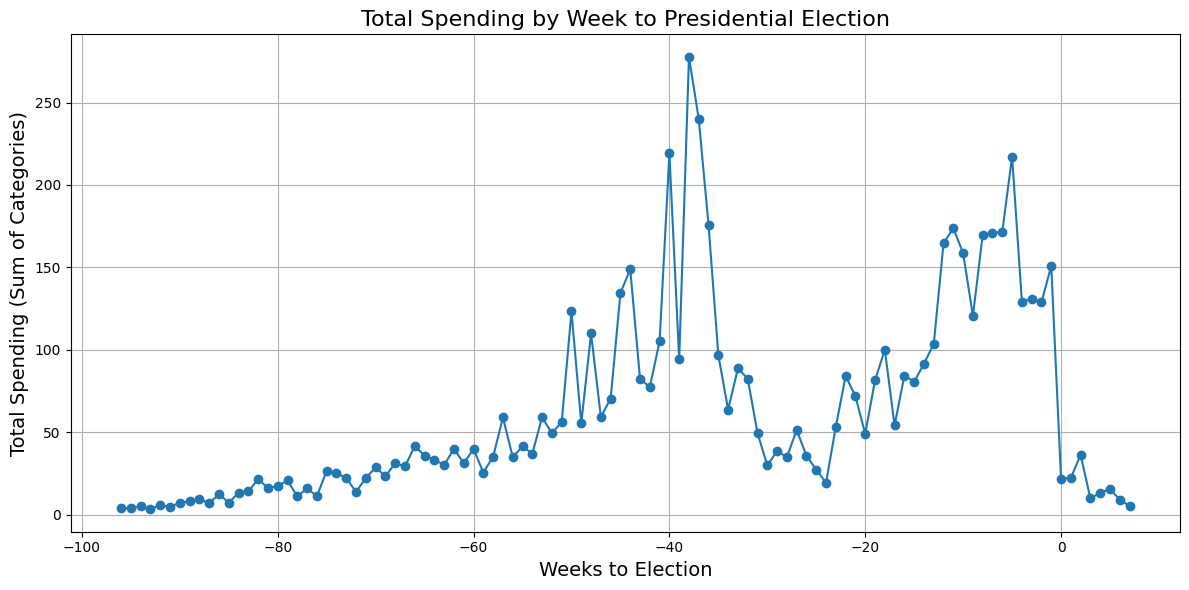

In [24]:
spending_categories = ['total']

# Check available columns in the dataset
available_categories = [col for col in spending_categories if col in president_expenses.columns]

# Create a new column 'sum_expenses' as the sum of the specified categories
president_expenses['sum_expenses'] = president_expenses[available_categories].sum(axis=1)

# Group data by 'week_to_election' and calculate the total spending for each week
weekly_expenses = president_expenses.groupby('week_to_election')['sum_expenses'].sum().reset_index()

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(weekly_expenses['week_to_election'], weekly_expenses['sum_expenses'], marker='o', linestyle='-')
plt.title('Total Spending by Week to Presidential Election', fontsize=16)
plt.xlabel('Weeks to Election', fontsize=14)
plt.ylabel('Total Spending (Sum of Categories)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
digital_expenses_categories = ['digital', 'media']

non_digital_expenses_categories = ['admin', 'consulting', 'field', 'fund', 'poll', 'legal',
    'travel', 'other']

# Check if all columns are present in the dataset
available_digital = [col for col in digital_expenses_categories if col in president_expenses.columns]
available_non_digital = [col for col in non_digital_expenses_categories if col in president_expenses.columns]

# Create new columns 'digital_expenses' and 'non_digital_expenses' as the sum of the respective categories
president_expenses['digital_expenses'] = president_expenses[available_digital].sum(axis=1)
president_expenses['non_digital_expenses'] = president_expenses[available_non_digital].sum(axis=1)

# Verify the new columns have been created
print("Columns added: 'digital_expenses' and 'non_digital_expenses'")
print(president_expenses[['digital_expenses', 'non_digital_expenses']].head())

Columns added: 'digital_expenses' and 'non_digital_expenses'
    digital_expenses  non_digital_expenses
14          0.307035              1.522635
15          3.299235              1.805897
16          0.620605              0.962331
37          0.146346              1.261106
38          3.298798              1.291675


<ipython-input-25-979a875c226c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  president_expenses['digital_expenses'] = president_expenses[available_digital].sum(axis=1)
<ipython-input-25-979a875c226c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  president_expenses['non_digital_expenses'] = president_expenses[available_non_digital].sum(axis=1)


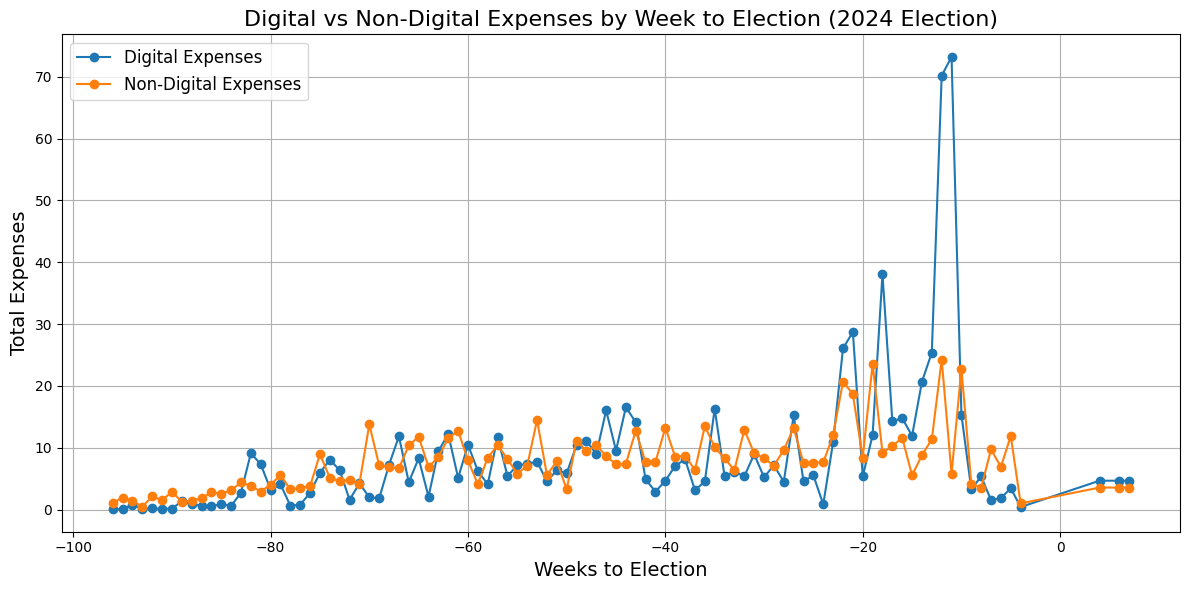

In [26]:
spending_data_2024 = president_expenses[president_expenses['election'] == '2024 election']

# Here i am grouping data by 'week_to_election' and calculate total digital and non-digital expenses
weekly_expenses_2024 = spending_data_2024.groupby('week_to_election')[['digital_expenses', 'non_digital_expenses']].sum().reset_index()

# the digital vs non-digital expenses over weeks to election for the 2024 election
plt.figure(figsize=(12, 6))
plt.plot(weekly_expenses_2024['week_to_election'], weekly_expenses_2024['digital_expenses'], label='Digital Expenses', marker='o', linestyle='-')
plt.plot(weekly_expenses_2024['week_to_election'], weekly_expenses_2024['non_digital_expenses'], label='Non-Digital Expenses', marker='o', linestyle='-')
plt.title('Digital vs Non-Digital Expenses by Week to Election (2024 Election)', fontsize=16)
plt.xlabel('Weeks to Election', fontsize=14)
plt.ylabel('Total Expenses', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

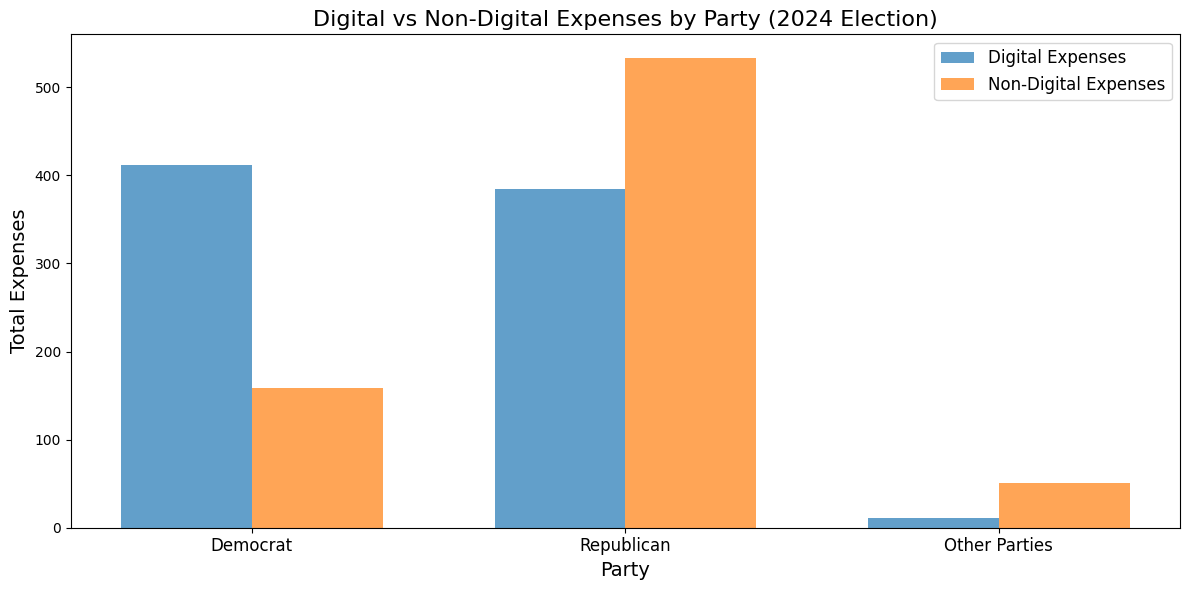

In [27]:
# here grouping data by 'party_combined' and calculate total digital and non-digital expenses for each party
party_expenses_2024 = spending_data_2024.groupby('party_combined')[['digital_expenses', 'non_digital_expenses']].sum().reset_index()

# putting party labels for clarity
party_labels = {'Dem': 'Democrat', 'GOP': 'Republican', 'Other': 'Other Parties'}
party_expenses_2024['party_combined'] = party_expenses_2024['party_combined'].map(party_labels)
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(party_expenses_2024['party_combined']))

# Bar plot
plt.bar(x, party_expenses_2024['digital_expenses'], width=bar_width, label='Digital Expenses', alpha=0.7)
plt.bar([i + bar_width for i in x], party_expenses_2024['non_digital_expenses'], width=bar_width, label='Non-Digital Expenses', alpha=0.7)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Total Expenses', fontsize=14)
plt.title('Digital vs Non-Digital Expenses by Party (2024 Election)', fontsize=16)
plt.xticks([i + bar_width / 2 for i in x], party_expenses_2024['party_combined'], fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

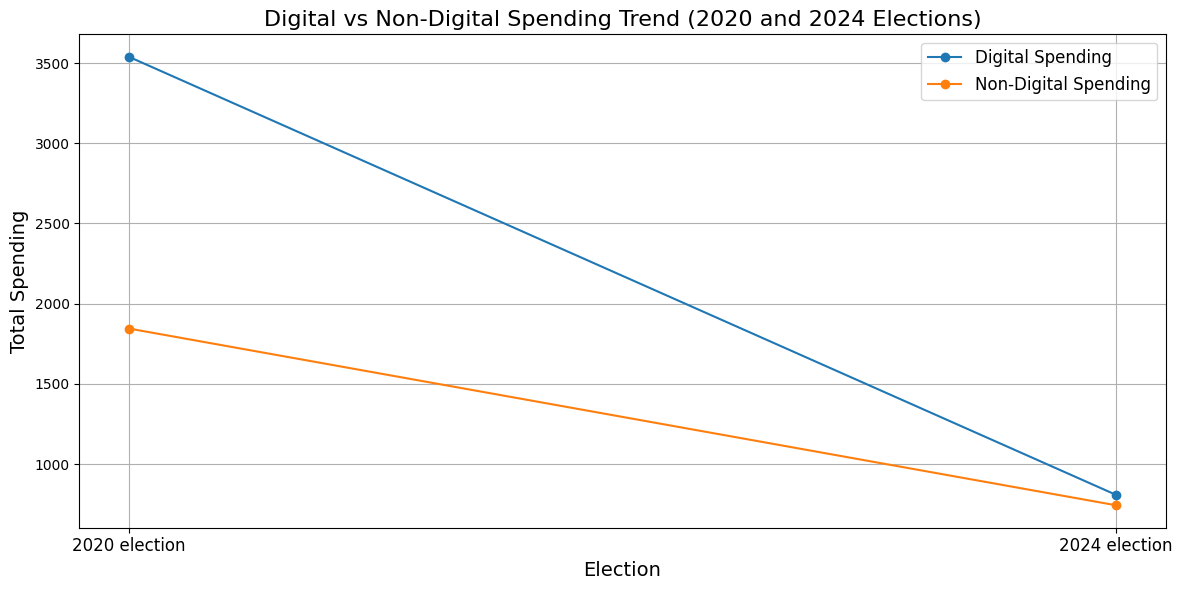

In [28]:
filtered_expenses = president_expenses[president_expenses['election'].isin(['2020 election', '2024 election'])]

# here grouping data by 'election' and calculate total digital and non-digital spending for the selected years
spending_trend = filtered_expenses.groupby('election')[['digital_expenses', 'non_digital_expenses']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(spending_trend['election'], spending_trend['digital_expenses'], marker='o', linestyle='-', label='Digital Spending')
plt.plot(spending_trend['election'], spending_trend['non_digital_expenses'], marker='o', linestyle='-', label='Non-Digital Spending')
plt.title('Digital vs Non-Digital Spending Trend (2020 and 2024 Elections)', fontsize=16)
plt.xlabel('Election', fontsize=14)
plt.ylabel('Total Spending', fontsize=14)
plt.xticks(spending_trend['election'], fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()